## Add noise to image

The goal of this work is to add noise on our image's database. Here we just implement the gaussian noise. Our objective is to add gaussian noise to a certain amount of the image.

In [1]:
import numpy as np
from PIL import Image
import os, sys
import multiprocessing
from multiprocessing import Pool
import glob
import fnmatch
import shutil
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise as rdn

The following function is dedicated to read all the images given a path to a database

In [248]:
def read_images(path, sz=None): 
    '''
    Chargement des données
    '''
    c=0
    X,y = [], []
    for dirname , dirnames , filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname , subdirname) 
            for filename in os.listdir(subject_path):
                try:
                    im = Image.open(os.path.join(subject_path , filename)) 
                    im = im.convert("L")
                    # resize to given size (if given)
                    if (sz is not None):
                        im = im.resize(sz, Image.ANTIALIAS)     
                    X.append(np.asarray(im, dtype=np.uint8)) 
                    y.append(c)
                except IOError:
                    print("I/O error({0}): {1}".format("errno", "strerror"))
                except:
                    print("Unexpected error:", sys.exc_info()[0] )
                    raise
            c = c+1 
    return [X,y]

The following class is the main class. Given a amount of pixel of the image and a sigma for the gaussian noise to add , it builds an object Noised_process which has "gaussian_noise" method which builds another database of noisy images.

In [276]:
class Noised_process:
    
    '''
    Noised_process : takes an amount of pixel to noise and a sigma strength of gaussian noise
    '''
    
    def __init__(self,amount,sigma):   
        self.amount=amount
        self.sigma=sigma
 
    '''
    gaussian_noise : takes im_name path to an image. Build another noisy image in the same directory
    '''
    def gaussian_noise(self,im_name):
        pil_image = Image.open(im_name)
    
        im_size = pil_image.size
        im_array = np.asarray(pil_image).astype(float)
        vector=im_array.ravel().copy()
        totalSize=im_size[0]*im_size[1]
        
        # Applies gaussian noise to a certain amount of random pixels
        index=np.random.randint(totalSize,size=int(totalSize*self.amount))
        noise=np.random.randn(1,int(totalSize*self.amount))*self.sigma

        noisy_vector=vector
        noisy_vector.flags.writeable = True
        noisy_vector[index]=noisy_vector[index]+noise
        noisy_img=noisy_vector.reshape((im_size[1],im_size[0]))
        noisy_img = np.round(noisy_img)
        
        # Cut to have a 8 bits image
        noisy_img[noisy_img<0]=0
        noisy_img[noisy_img>=255]=255
        
        # create appropriate dirrectorries
        dir_model = os.path.split(os.path.split(im_name)[0])[0]
        dir_model = dir_model.replace(source_root,process_root)
        if not os.path.exists(dir_model):
            os.makedirs(dir_model)
        dir_block = os.path.split(im_name)[0]
        dir_block = dir_block.replace(source_root,process_root)
        if not os.path.exists(dir_block):
            os.makedirs(dir_block)
        im_out_name = im_name.replace(source_root,process_root)
        noisy_img = noisy_img.astype(dtype=np.uint8)
        im_noise_pgm = Image.fromarray(noisy_img)
        im_noise_pgm.save(im_out_name)
        

## Results on small database

Here we make just few tests fo some image

In [ ]:
## Change path to images
source_root = '/Users/vayer/Documents/PYTHON/facerecog - copie/FaceRecogTool/FaceRecogTool/FaceDatabase/Database1/Train_Data/s01'
process_root = '/Users/vayer/Documents/PYTHON/facerecog - copie/FaceRecogTool/FaceRecogTool/FaceDatabase/Database1/Train_Data_noisy/s01noisy' #Create noisy images in a new directories

In [ ]:
for root, dirnames, filenames in os.walk(source_root):
    for filename in fnmatch.filter(filenames, '*.pgm'):
        list_im.append(os.path.join(root, filename))

We parallelize to make the transformation faster.

In [ ]:
if not os.path.exists(process_root):
    os.makedirs(process_root)    
nbCores = multiprocessing.cpu_count()
pool = Pool(nbCores)
process=Noised_process(0.5,15)
pool.map(process.gaussian_noise,list_im)
pool.close()
pool.join()

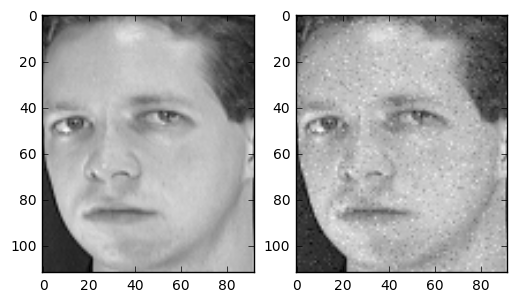

In [266]:
path='/Users/vayer/Documents/PYTHON/facerecog - copie/FaceRecogTool/FaceRecogTool/FaceDatabase/Database1/Train_Data'
path_noise='/Users/vayer/Documents/PYTHON/facerecog - copie/FaceRecogTool/FaceRecogTool/FaceDatabase/Database1/Train_Data_noisy'
imgs=read_images(path)
noisy_imgs=read_images(path_noise)
plt.subplot(121)
plt.imshow(imgs[0][0],cmap='gray')
plt.subplot(122)
plt.imshow(noisy_imgs[0][0],cmap='gray')
plt.show()

## On Yale Database

Here we create the full noisy database on the Yale database with an amount of 50% noise for each image and a noise strength sigma of 15.

In [270]:
## Change path to images
source_root = '/Users/vayer/Documents/PYTHON/facerecog - copie/ExtendedYaleB'
process_root = '/Users/vayer/Documents/PYTHON/facerecog - copie/ExtendedYaleBNoisy' #Create noisy images in a new directories

In [273]:
list_im=[]
for root, dirnames, filenames in os.walk(source_root):
    for filename in fnmatch.filter(filenames, '*.pgm'):
        list_im.append(os.path.join(root, filename))

In [277]:
if not os.path.exists(process_root):
    os.makedirs(process_root)    
nbCores = multiprocessing.cpu_count()
pool = Pool(nbCores)
process=Noised_process(0.5,15)
pool.map(process.gaussian_noise,list_im)
pool.close()
pool.join()